170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 57ms/step - accuracy: 0.2356 - loss: 2.0639 - val_accuracy: 0.4195 - val_loss: 1.6387
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 19s 52ms/step - accuracy: 0.4322 - loss: 1.5772 - val_accuracy: 0.4720 - val_loss: 1.4828
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 16s 51ms/step - accuracy: 0.4871 - loss: 1.4217 - val_accuracy: 0.4800 - val_loss: 1.4644
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 18s 59ms/step - accuracy: 0.5294 - loss: 1.3117 - val_accuracy: 0.5110 - val_loss: 1.3478
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 18s 50ms/step - accuracy: 0.5614 - loss: 1.2091 - val_accuracy: 0.5595 - val_loss: 1.2702
313/313 - 5s - 16ms/step - accuracy: 0.5455 - loss: 1.2803
Test accuracy: 0.55
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


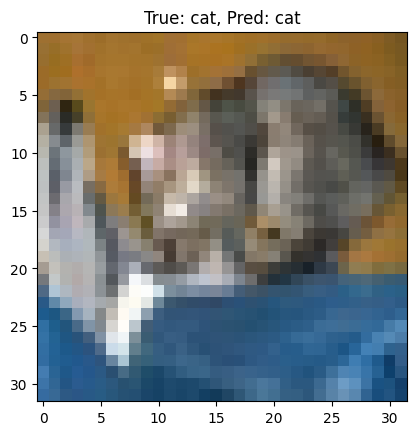

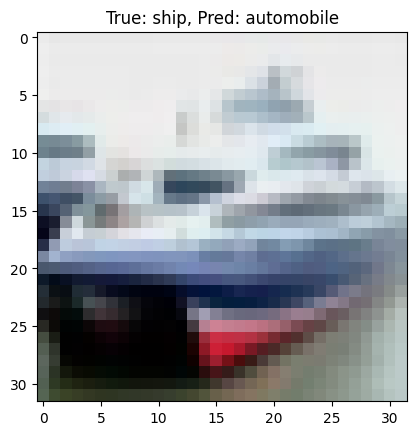

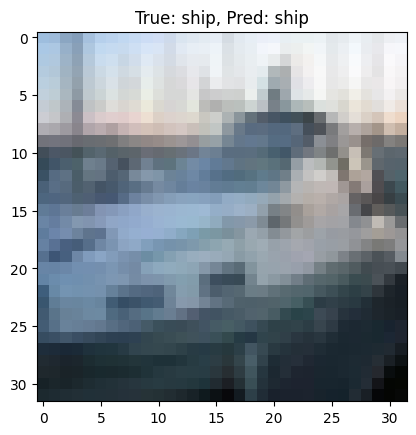

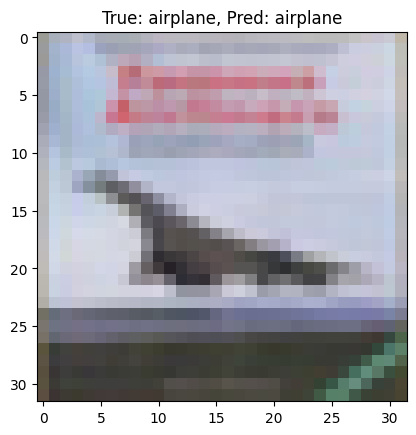

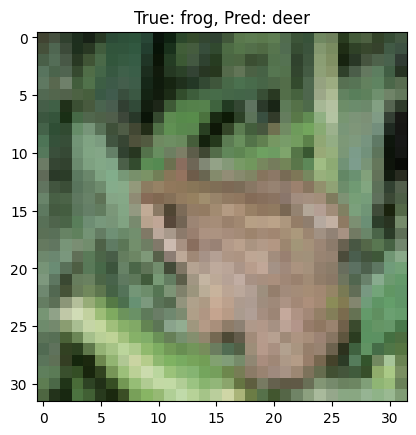

In [1]:
# CIFAR-10 Image Classification Mini Project

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

# 1. Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

# Class names
class_names = ['airplane', 'automobile', 'bird', 'cat',
               'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# 2. Normalize pixel values (0-255 → 0-1)
x_train, x_test = x_train / 255.0, x_test / 255.0

# 3. Build a simple CNN model
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes
])

# 4. Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 5. Train on small subset (to keep it fast)
model.fit(x_train[:10000], y_train[:10000], epochs=5,
          validation_data=(x_test[:2000], y_test[:2000]))

# 6. Evaluate
loss, acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {acc:.2f}")

# 7. Predict first 5 images
predictions = model.predict(x_test[:5])
for i in range(5):
    plt.imshow(x_test[i])
    plt.title(f"True: {class_names[y_test[i][0]]}, Pred: {class_names[np.argmax(predictions[i])]}")
    plt.show()
